In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "root",
                             database = "ecommerce")
cur =db.cursor()

# List all unique cities where customers are located.

In [2]:
query = """select distinct customer_city from customers"""
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [3]:
query = """select count(order_id)from orders where year(order_purchase_timestamp)= 2017"""
cur.execute(query)
data = cur.fetchall()
"total orders placed in 2017 are", data [0] [0]

('total orders placed in 2017 are', 45101)

# Find the total sales per category.

In [4]:
# Corrected SQL query
query = """
SELECT products.product_category category,
       ROUND(SUM(payments.payment_value), 2) sales
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY category
"""

# Execute the query
cur.execute(query)

# Fetch all results
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category" , "Sales"]) 
df

,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,Fashion Bags and Accessories,218158.28
4,bed table bath,1712553.67
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


# Calculate the percentage of orders that were paid in installments.

In [5]:
query = """
SELECT (sum(case when payment_installments >= 1 then 1 else 0 end))/ count(*)* 100 from payments 
"""

# Execute the query
cur.execute(query)

# Fetch all results
data = cur.fetchall()

"the percentage of orders that were paid in installments", data [0] [0]

('the percentage of orders that were paid in installments', Decimal('99.9981'))

# Count the number of customers from each state. 

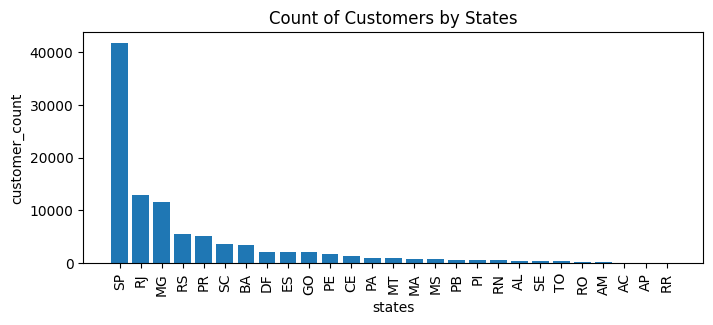

In [15]:
query = """ select customer_state ,count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df = df.sort_values(by = "customer_count", ascending= False)

plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

# Calculate the number of orders per month in 2018.

In [ ]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count from orders where year(order_purchase_timestamp) = 2018 group by months"""


cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["Month", "Order_count"])

# Define the order of months
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October"]

# Convert 'Month' to a categorical type with the correct order
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

# Sort the DataFrame based on the Month category
df = df.sort_values('Month')

# Plotting the bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Order_count', data=df, order=months_order)
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.title('Order Count by Month in 2018')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()


# Find the average number of products per order, grouped by customer city.

In [ ]:
query = """ with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as OC from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc), 2) as avg_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by avg_orders desc
"""


cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "Avg products/orders"])
df.head (10)

# Calculate the percentage of total revenue contributed by each product category.

In [ ]:
query = """SELECT upper (products.product_category) as category,
round((SUM(payments.payment_value)/(select sum(payment_value) from payments)) * 100,2) sales_percentage
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY category
order by sales_percentage desc"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["category", "percentage distribution"])
df.head (10)

# Identify the correlation between product price and the number of times a product has been purchased.

In [ ]:
query = """ select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category """

import numpy as np
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["category", "Order_count", "price"])

arr1 = df["Order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print(" the corelation is", a [0],[-1])

# Calculate the total revenue generated by each seller, and rank them by revenue.

In [ ]:
query = """
SELECT 
    order_items.seller_id, 
    SUM(payments.payment_value) AS total_revenue,
    RANK() OVER (ORDER BY SUM(payments.payment_value) DESC) AS `rank`
FROM order_items 
JOIN payments ON order_items.order_id = payments.order_id
GROUP BY order_items.seller_id
ORDER BY `rank`;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["seller_id", "total_revenue", "rank"])


# Display the DataFrame
print(df)

# Calculate the moving average of order values for each customer over their order history.

In [ ]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
from
(SELECT orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

# Calculate the cumulative sales per month for each year.

In [ ]:
query = """SELECT years,months,payment,
    SUM(payment) OVER (ORDER BY years, months) AS cumulative_sales
FROM 
(
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        MONTH(orders.order_purchase_timestamp) AS months,
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM 
        orders 
    JOIN 
        payments ON orders.order_id = payments.order_id
    GROUP BY 
        YEAR(orders.order_purchase_timestamp), 
        MONTH(orders.order_purchase_timestamp)
    ORDER BY 
        YEAR(orders.order_purchase_timestamp), 
        MONTH(orders.order_purchase_timestamp)
) AS a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df = pd.DataFrame(data, columns=["year", "month", "payment","cumulative_value"])
df

# Calculate the year-over-year growth rate of total sales

In [ ]:
query = """with a as(SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM 
        orders 
    JOIN 
        payments ON orders.order_id = payments.order_id
    GROUP BY 
        years
    ORDER BY 
        years)
        select years, ((payment - lag(payment, 1) over(order by years))/lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [ ]:
query = """ WITH first_orders AS (
    SELECT 
        customers.customer_id,
        MIN(orders.order_purchase_timestamp) AS first_order
    FROM 
        customers 
    JOIN 
        orders ON customers.customer_id = orders.customer_id
    GROUP BY 
        customers.customer_id
),
retained_customers AS (
    SELECT 
        first_orders.customer_id
    FROM 
        first_orders 
    JOIN 
        orders ON orders.customer_id = first_orders.customer_id
    WHERE 
        orders.order_purchase_timestamp > first_orders.first_order
        AND orders.order_purchase_timestamp < DATE_ADD(first_orders.first_order, INTERVAL 6 MONTH)
    GROUP BY 
        first_orders.customer_id
)
SELECT 
    (COUNT(retained_customers.customer_id) * 100.0 / COUNT(first_orders.customer_id)) AS retention_rate
FROM 
    first_orders
LEFT JOIN 
    retained_customers ON first_orders.customer_id = retained_customers.customer_id;
"""
cur.execute(query)
data = cur.fetchall()
data

# Identify the top 3 customers who spent the most money in each year.

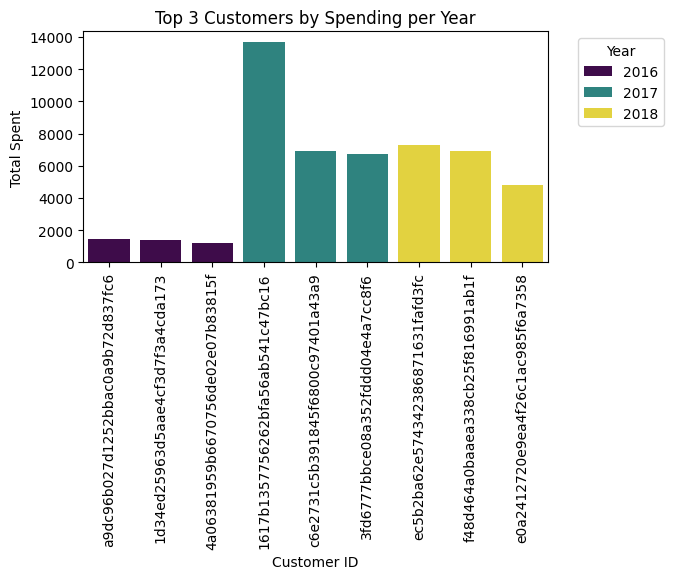

In [11]:
query = """ WITH yearly_spending AS (
    SELECT 
        customers.customer_id,
        YEAR(orders.order_purchase_timestamp) AS year,
        SUM(payments.payment_value) AS total_spent
    FROM 
        customers 
    JOIN 
        orders ON customers.customer_id = orders.customer_id
    JOIN 
        payments ON orders.order_id = payments.order_id
    GROUP BY 
        customers.customer_id,
        YEAR(orders.order_purchase_timestamp)
),
ranked_customers AS (
    SELECT 
        customer_id,
        year,
        total_spent,
        RANK() OVER (PARTITION BY year ORDER BY total_spent DESC) AS d_rank
    FROM 
        yearly_spending
)
SELECT 
    customer_id,
    year,
    total_spent
FROM 
    ranked_customers
WHERE 
    d_rank <= 3
ORDER BY 
    year, 
    d_rank;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer_id", "year", "total_spent"])
df['customer_id'] = df['customer_id'].astype(str)  # Convert customer_id to string for better readability

# Create a seaborn barplot
plt.figure(figsize=(6, 3)) 

sns.barplot(x='customer_id', y='total_spent', hue='year', data=df, palette='viridis')

plt.title('Top 3 Customers by Spending per Year')
plt.xlabel('Customer ID')
plt.ylabel('Total Spent')

plt.xticks(rotation=90)


plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()